# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Devoir 2 - Régression linéaire ( 15 points )

Le présent devoir concerne les notions de la régression linéaire vues au Chapitre 2 du cours. Pour ce devoir, vous devez élaborer une analyse complète de régression à l'exercice 1 pour répondre aux questions de l'exercice 2.


## Devoir effectué par

Paré, Marie-Christine - 1901114

Roy, Fredérique - 

**Déclaration d’intégrité relative au plagiat**

Nous certifions sur l’honneur :
- Que les résultats décrits dans ce rapport sont l’aboutissement de notre travail.
- Que nous sommes les auteurs de ce rapport.
- Que nous n'avons pas utilisé des sources ou résultats tiers sans clairement les citer et les référencer selon les règles bibliographiques préconisées.

Nous déclarons que ce travail ne peut être soupçonné de plagiat.



## Contexte : Glycémie des patients

Nous étudierons la glycémie sanguine (glu) en fonction de plusieurs variables explicatives : 
- l'âge du patient (age)
- l'indice de masse corporel du patient (bmi)
- le sexe du patient (sex)
- de la tension artérielle moyenne (map) 
- 5 indicateur sanguins (tc, ldl, hdl, tch et ltg). 


## Consignes

- Le devoir doit être remis sur Moodle **avant 23h59 lundi le 15 février 2020**. Les retards ne seront pas tolérés car le solutionnaire sera publié dès mardi.
- Le devoir a une pondération de 15%.
- Écrivez vos noms et vos matricules dans l'espace prévu à cet effet dans cette cellule.
- Vous pouvez compléter le devoir en équipe de deux personnes. Dans ce cas, un seul fichier par équipe doit être remis. Pour vous aider à trouver un coéquipier, le canal de discussion *#trouver_un_coéquipier* a été créé sur Slack.
- Le devoir doit être complété dans le présent calepin Jupyter en ajoutant autant de cellules de texte et de code que nécessaires. Vous remettrez ce fichier en format *.ipynb*. Le nom du fichier doit être *matricule1_matricule2_devoir2.ipynb*.
- N'utilisez que les librairies introduites à la cellule suivante.

## Chargement des libairies

In [19]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
using Statistics

## Chargement des données

In [20]:
data = CSV.read("diabetes.csv", DataFrame)
select!(data, Not(:prog))

#Définition des variables explicatives 
x₁=data[!,1]
x₂=data[!,2]
x₃=data[!,3]
x₄=data[!,4]
x₅=data[!,5]
x₆=data[!,6]
x₇=data[!,7]
x₈=data[!,8]
x₉=data[!,9]

# Définitions de la variables d'intérêt
y=data[!,10]

#Taille de l'échantillon
n=length(y)

first(data,5)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,59,1,32.1,101.0,157,93.2,38.0,4.0,2.11,87
2,48,0,21.6,87.0,183,103.2,70.0,3.0,1.69,69
3,72,1,30.5,93.0,156,93.6,41.0,4.0,2.03,85
4,24,0,25.3,84.0,198,131.4,40.0,5.0,2.12,89
5,50,0,23.0,101.0,192,125.4,52.0,4.0,1.86,80


## Exercice 1 - Régression linéaire simple (5 points)

### (a) Estimez les coefficients de régression de la régression linéaire simple en utilisant la tension artérielle moyenne (map) comme variable explicative pour prédire la glycémie (gly).¶


L'ordonnée à l'origine estimée est β̂₀=60.54670237176922
La pente de la droite de régression estimée est β̂₁=0.32450691908643253


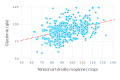

In [21]:
# Calcul des statistiques utiles 
x̄₄=mean(x₄)
ȳ=mean(y)

# Estimation des paramètres
β̂₁ = sum( (x₄[i] - x̄₄)*(y[i] - ȳ) for i=1:n) / sum( (x₄[i] - x̄₄)^2 for i=1:n )

β̂₀ = ȳ - β̂₁*x̄₄

println("L'ordonnée à l'origine estimée est β̂₀=", β̂₀)
println("La pente de la droite de régression estimée est β̂₁=", β̂₁)

#Graphique 

Gadfly.set_default_plot_size(12cm, 8cm)
plot(data, x=:map, y=:glu, Geom.point, 
    intercept = [β̂₀], slope = [β̂₁], Geom.abline(color="red", style=:dash),
    Coord.cartesian(xmin=50, xmax=140),
    Guide.xlabel("Tension artérielle moyenne (map)"),
    Guide.ylabel("Glycémie (glu)"))

# C'est quoi les unités


### (b) Calculez le coefficient de détermination du modèle en (a).

In [25]:
#Décomposition de la variabilité 

SST=sum((y[i] - ȳ)^2 for i=1:n)
SSR=sum( ((β̂₀+x₄[i]*β̂₁) - ȳ)^2 for i=1:n)
SSE=sum((y[i]-(β̂₀+x₄[i]*β̂₁))^2 for i=1:n)

# Coefficient de détermination 
R²=(SSR/SST)

println("Le coefficient de détermination R²=",R²)

Le coefficient de détermination R²=0.15244004445789733


### (c) Est-ce que la tension artérielle moyenne possède un pouvoir prédictif significatif pour la glycémie ?

Justifiez bien votre réponse.

F₀=79.13731544640319
seuil=3.8626797051751893
On rejette l'hypothèse nulle.


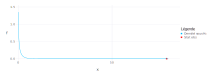

In [27]:
#Test d'hypothèse 

# H₀ : β₁=0 
# H₁ : β₁!=0

#Nombre de variables explicatives
p=1 

# Statistique du test 
F₀= ((n-p-1)/p) * SSR/SSE
println("F₀=",F₀)

#Fonction de distribution. 
dist = FDist(p, n-p-1)
x = range(0, stop=80, length=1000)

# Calcule de la région critique pour le rejet de l'hypothèse nulle. 
# On utilise un risque de α=5 %. 

#le quantile d’ordre 95% de la loi de Fisher
seuil = quantile(dist, .95)
println("seuil=",seuil)

if F₀ > seuil
    println("On rejette l'hypothèse nulle.")
else
    println("On ne rejette pas l'hypothèse nulle.")
end

density= layer(x=x, y=pdf.(dist,x), Geom.line, Theme(default_color="deepskyblue"))
statObs = layer(x=[F₀], y=[0], Geom.point, Theme(default_color="red") )

Gadfly.set_default_plot_size(21cm, 8cm)
plot(density, statObs,
    Guide.manual_color_key("Légende", ["Densité sous H₀", "Stat obs"], ["deepskyblue","red"]),
    Coord.Cartesian(xmin=0,xmax=85), Guide.xlabel("x"), Guide.ylabel("f"))


### (d) Si un patient a une tension artérielle moyenne de 100, calculez un intervalle de confiance de niveau 95% pour sa glycémie.

In [67]:
# Calcul de ŷ. 
x₀=[1;100]# Transposé ce vecteur là 

# Matrice de structure
X = hcat(ones(n), convert(Array{Float64},x₄))
β̂ = (X'X)\X'y
Ŷ₀ = x₀'*β̂

#Calcul de l'intervalle de prédiction

# Estimation de la variance de l'erreur
σ̂² = (SSE/(n-p-1))


# Calcul de la marge d'erreur
q = quantile(TDist(n-p-1),.95)
se= q*sqrt(σ̂²*(1+x₀'*inv(X'X)*x₀))


Binf=Ŷ₀-se 
Bsup=Ŷ₀+se


println("L'intervalle de confiance de Ŷ₀ est [$(Ŷ₀ - se) , $(Ŷ₀ + se)]")



L'intervalle de confiance de Ŷ₀ est [75.63242917201538 , 110.3623593888095]


### (e) Considérez l'indice de masse corporel comme (bmi) comme seule variable explicative. Laquelle des deux variables entre bmi et map possède le plus grand pouvoir prédictif de la glycémie ?

Justifiez bien votre réponse.

L'ordonnée à l'origine estimée est β̂₀=64.58425930024265
La pente de la droite de régression estimée est β̂₁=1.011378988796866
Le coefficient de détermination R²=0.15107213765813465


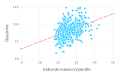

In [46]:
# Calcul des statistiques utiles pour la variable x3
x̄₃=mean(x₃)


# Estimation des paramètres
β̂₁= sum( (x₃[i] - x̄₃)*(y[i] - ȳ) for i=1:n) / sum( (x₃[i] - x̄₃)^2 for i=1:n )

β̂₀ = ȳ - β̂₁*x̄₃

println("L'ordonnée à l'origine estimée est β̂₀=", β̂₀)
println("La pente de la droite de régression estimée est β̂₁=", β̂₁)

#x1
SSR=sum( ((β̂₀+x₃[i]*β̂₁) - ȳ)^2 for i=1:n)

R²=(SSR/SST)
println("Le coefficient de détermination R²=",R²)

#Graphique 

Gadfly.set_default_plot_size(12cm, 8cm)
plot(data, x=:bmi, y=:glu, Geom.point, 
    intercept = [β̂₀], slope = [β̂₁], Geom.abline(color="red", style=:dash),
    Coord.cartesian(xmin=0, xmax=50),
    Guide.xlabel("Indice de masse corporelle"),
    Guide.ylabel("Glycémie"))

# Test d'hypothèse 



## Exercice 2 - Effet du sexe (5 points)

### (a) Ajoutez le sexe comme variable explicative au modèle de l'exercice 1(a). Est-ce que le sexe possède un pouvoir prédictif significatif de la glycémie ?

In [68]:
# modèle avec x2 et x4 

# Construction de la matrice de structure 
X₁= hcat(ones(n),x₂)
X₂= hcat(ones(n),x₂,x₄) 

# Estimation des paramètres
β̂₁ = (X₁'X₁)\X₁'y
β̂₂ = (X₂'X₂)\X₂'y

#Statistique 
ȳ = mean(y)
ŷ = X₁*β̂

e = y-ŷ

#Décomposition de la variabilité 
SST = sum( (y .- ȳ).^2 )
SSR = sum( (ŷ .- ȳ).^2 )
SSE = sum(e.^2)

#Coefficient de détermination
R²=(SSR/SST)
println("Le coefficient de détermination R²=",R²)

#Test d'hypothèse sur la variable x₂ 
#Nombre de variables explicatives
p=1

# Statistique du test 
F₀=((n-p-1)/p) * SSR/SSE
println("F₀=",F₀)

#Fonction de distribution. 
dist = FDist(p, n-p-1)
x = range(0, stop=80, length=1000)

# Calcule de la région critique pour le rejet de l'hypothèse nulle. 
# On utilise un risque de α=5 %. 

#le quantile d’ordre 95% de la loi de Fisher
seuil = quantile(dist, .95)
println("seuil=",seuil)

if F₀ > seuil
    println("On rejette l'hypothèse nulle.")
else
    println("On ne rejette pas l'hypothèse nulle.")
end

#Test d'hypothèse sur le modèle à 2 variables 
#Statistique 
ȳ = mean(y)
ŷ = X₂*β̂₂

e = y-ŷ

#Décomposition de la variabilité 
SST = sum( (y .- ȳ).^2 )
SSR = sum( (ŷ .- ȳ).^2 )
SSE = sum(e.^2)

#Coefficient de détermination
R²=(SSR/SST)
println("Le coefficient de détermination R²=",R²)

#Test d'hypothèse sur la variable x₂ 
#Nombre de variables explicatives
p=2

# Statistique du test 
F₀=((n-p-1)/p) * SSR/SSE
println("F₀=",F₀)

#Fonction de distribution. 
dist = FDist(p, n-p-1)
x = range(0, stop=80, length=1000)

# Calcule de la région critique pour le rejet de l'hypothèse nulle. 
# On utilise un risque de α=5 %. 

#le quantile d’ordre 95% de la loi de Fisher
seuil = quantile(dist, .95)
println("seuil=",seuil)

if F₀ > seuil
    println("On rejette l'hypothèse nulle.")
else
    println("On ne rejette pas l'hypothèse nulle.")
end

println(β̂₁)
println(β̂₂)


Le coefficient de détermination R²=7.083151108060823
F₀=385.8459765825718
seuil=3.8626797051751893
On rejette l'hypothèse nulle.
Le coefficient de détermination R²=0.16624785916718018
F₀=43.767689820557294
seuil=3.0162684445779657
On rejette l'hypothèse nulle.
[89.01702127659574, 4.789742008428401]
[61.53704394198325, 2.78628090918538, 0.3002564058116172]


On voit que le modèle de régression linéaire de la variable explicative x2 à un pouvoir prédictif se rapprochant de la moyenne. Le test d'hypothèse a cependant montrer que cette variable avait un pouvoir prédictif significatif. 

### (b) Interprétez les estimations des coefficients de régression que vous avez obtenues en 2 (b).

### (c) Choix du modèle bidimensionnel

Considérez le modèle de régression utilisant l'indice de masse corporelle et le sexe comme variables explicatives. Est-ce un meilleur modèle que celui de l'exercice 2(a) ? Est-ce cohérent avec la réponse du 1(e) ? Justifiez.

## Exercice 3 - Modèle tridimensionnel (5 points)

Considérez maintenant le modèle de régression linéaire utilisants les variables `:map`, `:bmi` et `:sex`.

### (a) Est-ce que l'hypothèse de linéarité semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

### (b) Est-ce que l'hypothèse d'homoscédasticité de la variance semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

### (c) Y a-t-il présence de multicolinéarité ?

Justifiez bien votre réponse. S'il y a multicolinéarité, que proposeriez vous pour limiter son effet ?

In [ ]:
#VFI 